# 房价预测机器学习项目

本项目将使用机器学习算法对房价进行预测。我们将按照以下步骤进行：

1. 数据加载与探索
2. 数据预处理
3. 特征工程
4. 模型训练与评估
5. 模型优化
6. 预测测试集房价

## 1. 数据加载与探索

In [2]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# 设置图表样式
plt.style.use('seaborn')
sns.set_style('whitegrid')

In [3]:
# 加载数据
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# 查看训练集的基本信息
print("训练集形状:", train_data.shape)
train_data.head()

训练集形状: (47439, 41)


,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [4]:
# 查看测试集的基本信息
print("测试集形状:", test_data.shape)
test_data.head()

测试集形状: (31626, 40)


,Id,Address,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,47439,3034 N Coolidge Ave,Live within steps to the scenic views on the L...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,...,Tandem Uncovered,NaN,NaN,2020-11-06,799900.0,2020-07-01,819000.0,Dodgertown,90090,CA
1,47440,565 Kenilworth Ave,duplex fixer. Input for comps only,SingleFamily,1924.0,Natural Gas,NaN,Detached,10018.8,3,...,Detached,521977.0,7494.0,2014-04-04,479950.0,2020-11-03,15000.0,San Leandro,94577,CA
2,47441,3028 N Coolidge Ave,Live within steps to the scenic views on the L...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,...,Tandem Uncovered,NaN,NaN,2020-11-12,839900.0,NaN,NaN,Los Angeles,90039,CA
3,47442,3022 N North Coolidge Ave,Live within steps to the scenic views on the L...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,...,Tandem Uncovered,442800.0,5370.0,2020-11-06,809900.0,2020-09-21,810000.0,Dodgertown,90090,CA
4,47443,2515 Admiral Cir,"This beautiful, spacious home built in 2017 is...",SingleFamily,2017.0,Forced Air,Central Air,"Garage Door Opener, Attached",2613.6,4,...,"Garage Door Opener, Attached",965282.0,12912.0,2020-12-02,1095000.0,2019-12-27,1041000.0,Hayward,94545,CA


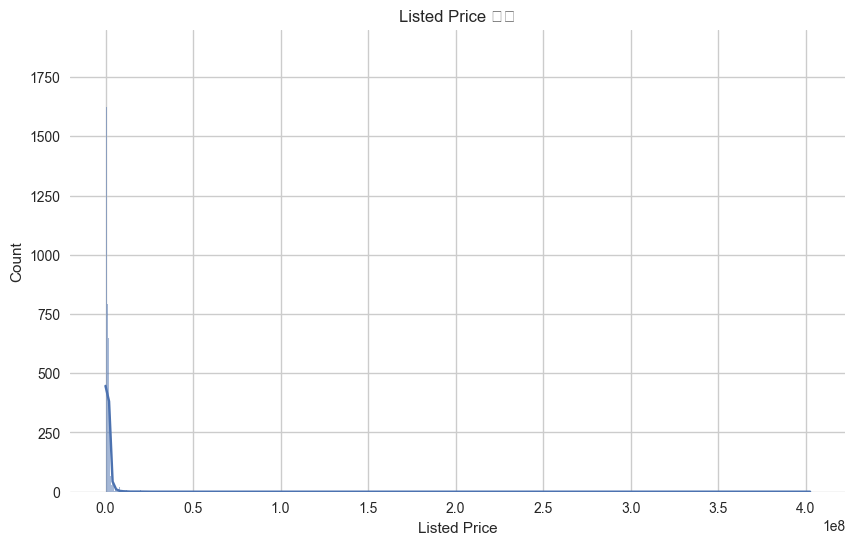

Listed Price 的统计信息:
count    4.743900e+04
mean     1.315890e+06
std      2.628695e+06
min      0.000000e+00
25%      5.745000e+05
50%      9.490000e+05
75%      1.498844e+06
max      4.025320e+08
Name: Listed Price, dtype: float64


In [5]:
# 检查训练集中的目标变量（房价）
# 假设目标变量是 'Listed Price' 或 'Last Sold Price'
target_column = 'Listed Price'  # 根据实际情况调整

if target_column in train_data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_data[target_column].dropna(), kde=True)
    plt.title(f'{target_column} 分布')
    plt.xlabel(target_column)
    plt.show()
    
    # 检查目标变量的基本统计信息
    print(f"{target_column} 的统计信息:")
    print(train_data[target_column].describe())
else:
    print(f"训练集中没有找到 {target_column} 列，请确认正确的目标变量列名")

In [6]:
# 检查缺失值
train_missing = train_data.isnull().sum()
test_missing = test_data.isnull().sum()

print("训练集缺失值情况:")
print(train_missing[train_missing > 0])
print("\n测试集缺失值情况:")
print(test_missing[test_missing > 0])

训练集缺失值情况:
Summary                          354
Year built                      1045
Heating                         6852
Cooling                        20694
Parking                         1374
Lot                            14181
Bedrooms                        2872
Bathrooms                       3465
Full bathrooms                  7865
Total interior livable area     2526
Total spaces                     916
Garage spaces                    917
Region                             2
Elementary School               4742
Elementary School Score         4896
Elementary School Distance      4742
Middle School                  16704
Middle School Score            16705
Middle School Distance         16704
High School                     5000
High School Score               5219
High School Distance            5001
Flooring                       11569
Heating features                7693
Cooling features               22223
Appliances included            13593
Laundry features            

## 2. 数据预处理

In [7]:
# 合并训练集和测试集进行预处理（不包括目标变量）
# 保存训练集的目标变量
if target_column in train_data.columns:
    y_train = train_data[target_column].copy()
    features = train_data.drop(columns=[target_column])
else:
    print(f"警告: 未找到目标变量 {target_column}，请确认正确的列名")
    features = train_data.copy()
    y_train = None

# 合并特征进行预处理
all_features = pd.concat([features, test_data], axis=0)
print("合并后的特征形状:", all_features.shape)

合并后的特征形状: (79065, 41)


In [ ]:
# 处理数值型特征
numeric_features = all_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
# 从数值型特征中移除ID列
if 'Id' in numeric_features:
    numeric_features.remove('Id')
# 处理分类特征
categorical_features = all_features.select_dtypes(include=['object']).columns.tolist()

print(f"数值型特征数量: {len(numeric_features)}")
print(f"分类特征数量: {len(categorical_features)}")

数值型特征数量: 19
分类特征数量: 21


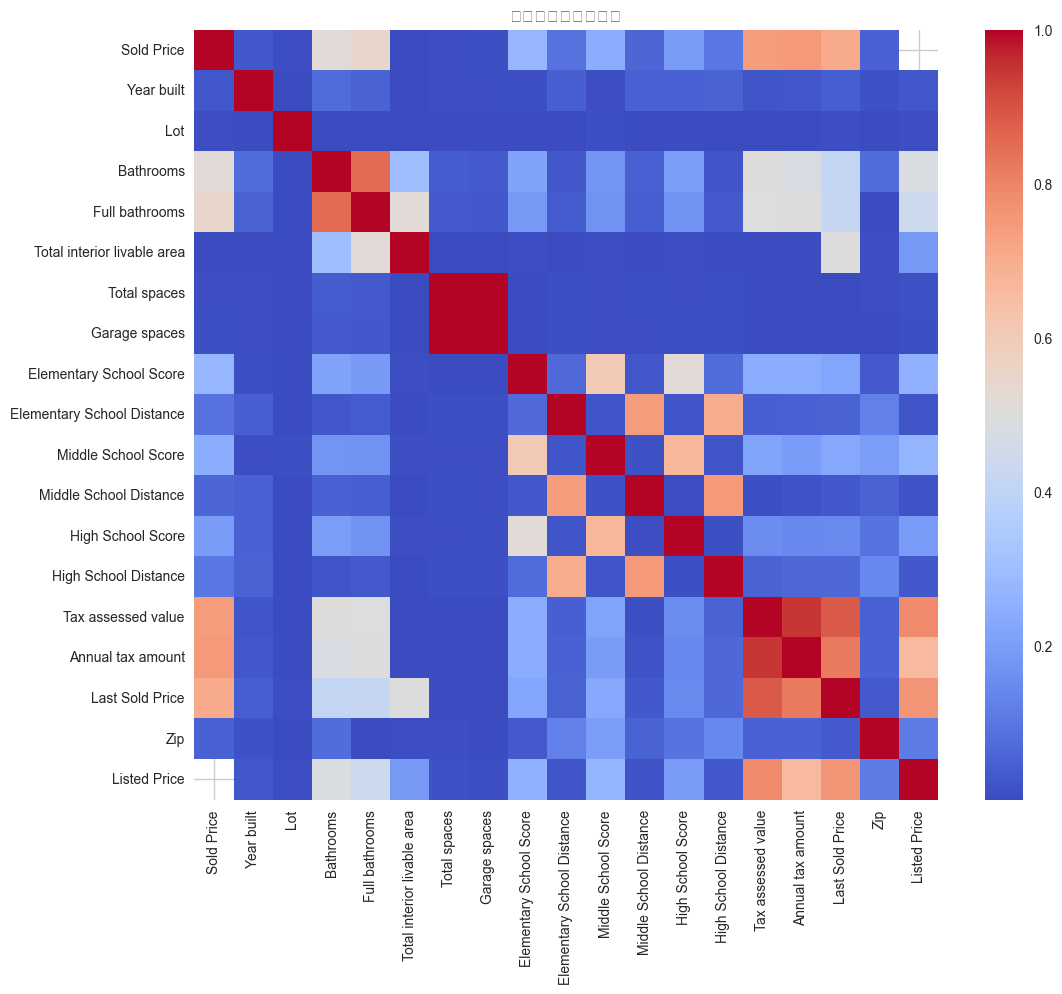

In [ ]:
# 查看数值特征的相关性
if len(numeric_features) > 0:
    plt.figure(figsize=(12, 10))
    correlation_matrix = all_features[numeric_features].corr().abs()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
    plt.title('数值特征相关性矩阵')
    plt.show()

## 3. 特征工程

In [10]:
# 创建数值特征和分类特征的预处理管道
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 组合所有转换器
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [11]:
# 分离回训练集和测试集
train_rows = len(train_data)
processed_features = preprocessor.fit_transform(all_features)

# 转换为稀疏矩阵
X_train_processed = processed_features[:train_rows]
X_test_processed = processed_features[train_rows:]

print("处理后的训练特征形状:", X_train_processed.shape)
print("处理后的测试特征形状:", X_test_processed.shape)

处理后的训练特征形状: (47439, 216140)
处理后的测试特征形状: (31626, 216140)


## 4. 模型训练与评估

In [12]:
# 定义评估函数
def evaluate_model(model, X, y):
    # 使用5折交叉验证
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    return rmse_scores.mean(), rmse_scores.std()

In [ ]:
# 训练多个模型并评估
if y_train is not None:
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
        'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42)
    }
    
    results = {}
    for name, model in models.items():
        print(f"训练 {name}...")
        mean_rmse, std_rmse = evaluate_model(model, X_train_processed, y_train)
        results[name] = (mean_rmse, std_rmse)
        print(f"{name} - 平均RMSE: {mean_rmse:.2f}, 标准差: {std_rmse:.2f}")
    
    # 可视化模型比较
    plt.figure(figsize=(12, 6))
    names = list(results.keys())
    rmse_means = [results[name][0] for name in names]
    rmse_stds = [results[name][1] for name in names]
    
    plt.barh(names, rmse_means, xerr=rmse_stds, alpha=0.7, capsize=5)
    plt.xlabel('RMSE (越低越好)')
    plt.title('模型性能比较')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("无法训练模型，因为目标变量不可用。请确认正确的目标变量列名。")

训练 Linear Regression...
Linear Regression - 平均RMSE: 1942722.56, 标准差: 1147426.73
训练 Ridge Regression...
Ridge Regression - 平均RMSE: 1886837.01, 标准差: 1171761.56
训练 Lasso Regression...


## 5. 模型优化

In [ ]:
# 选择表现最好的模型进行超参数调优
# 这里假设XGBoost是最佳模型，您可以根  据上面的结果调整
if y_train is not None:
    best_model = xgb.XGBRegressor(random_state=42)
    
    # 定义超参数网格
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
    
    # 使用网格搜索找到最佳参数
    grid_search = GridSearchCV(
        estimator=best_model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    
    grid_search.fit(X_train_processed, y_train)
    
    print("最佳参数:")
    print(grid_search.best_params_)
    print(f"最佳RMSE: {np.sqrt(-grid_search.best_score_):.2f}")
    
    # 使用最佳参数的模型
    optimized_model = grid_search.best_estimator_
else:
    print("无法优化模型，因为目标变量不可用。请确认正确的目标变量列名。")

## 6. 预测测试集房价

In [ ]:
# 使用优化后的模型预测测试集房价
if y_train is not None:
    # 预测
    test_predictions = optimized_model.predict(X_test_processed)
    
    # 创建提交文件
    submission = pd.DataFrame({
        'Id': test_data['Id'],
        'Predicted Price': test_predictions
    })
    
    # 保存预测结果
    submission.to_csv('house_price_predictions.csv', index=False)
    print("预测完成，结果已保存到 'house_price_predictions.csv'")
    
    # 显示部分预测结果
    submission.head(10)
else:
    print("无法进行预测，因为模型未能成功训练。请确认正确的目标变量列名。")

## 7. 特征重要性分析

In [ ]:
# 分析特征重要性（仅适用于树模型）
if y_train is not None and hasattr(optimized_model, 'feature_importances_'):
    # 获取特征名称
    feature_names = []
    
    # 获取数值特征名称
    if len(numeric_features) > 0:
        feature_names.extend(numeric_features)
    
    # 获取分类特征的OneHot编码后的名称
    if len(categorical_features) > 0:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        cat_feature_names = ohe.get_feature_names_out(categorical_features)
        feature_names.extend(cat_feature_names)
    
    # 确保特征名称数量与特征重要性数量一致
    if len(feature_names) == len(optimized_model.feature_importances_):
        # 创建特征重要性DataFrame
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': optimized_model.feature_importances_
        })
        
        # 按重要性排序
        feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)
        
        # 显示前20个最重要的特征
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
        plt.title('前20个最重要的特征')
        plt.tight_layout()
        plt.show()
        
        # 显示特征重要性表
        feature_importance.head(20)
    else:
        print(f"特征名称数量 ({len(feature_names)}) 与特征重要性数量 ({len(optimized_model.feature_importances_)}) 不匹配")
else:
    print("无法分析特征重要性，因为模型未能成功训练或不支持特征重要性分析。")

## 8. 结论与建议

在这个房价预测项目中，我们完成了以下工作：

1. 数据加载与探索：了解了数据的基本结构和特征
2. 数据预处理：处理了缺失值，并对数值和分类特征进行了转换
3. 特征工程：创建了特征处理管道
4. 模型训练与评估：尝试了多种回归模型并评估了它们的性能
5. 模型优化：对最佳模型进行了超参数调优
6. 预测测试集房价：使用优化后的模型预测了测试集中的房价
7. 特征重要性分析：分析了哪些特征对房价预测最重要

### 进一步改进的建议：

1. 特征选择：可以尝试使用特征选择技术来减少特征数量，提高模型性能
2. 特征交互：创建特征之间的交互项，可能会发现新的有用信息
3. 异常值处理：检测并处理异常值，可能会提高模型的稳定性
4. 集成方法：尝试将多个模型的预测结果进行集成，可能会获得更好的性能
5. 深度学习：如果数据量足够大，可以尝试使用神经网络模型

最终，我们的模型能够根据房屋的各种特征预测其价格，这对于房地产市场分析、投资决策和定价策略都有重要的参考价值。